In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

## DATA PROCESSING

In [2]:
OUTPUT_PATH = './Data/output/'

### 1. SDG data Import

In [38]:
raw_sdg_df = pd.read_csv(OUTPUT_PATH + 'CleanData_Population_Schools_SDGs.csv')
# raw_sgd_df = raw_sgd_df.dropna(subset=['No_of_Schools'])
raw_sdg_df = raw_sdg_df.dropna()
raw_sdg_df.head()
len(raw_sdg_df)

1529

In [5]:
cluster_df = raw_sdg_df.iloc[:,84:]
cluster_df = cluster_df * 100

### 2. CORRELATION HEATMAP

In [6]:
# cluster_df['NUM_SCH'] = raw_sgd_df['SCH_CAT_ES'] + raw_sgd_df['SCH_CAT_CES'] + raw_sgd_df['SCH_CAT_PS'] + raw_sgd_df['SCH_CAT_PES'] + \
#                         raw_sgd_df['SCH_CAT_JHS'] + raw_sgd_df['SCH_CAT_SHS'] + raw_sgd_df['SCH_CAT_PJHS'] + raw_sgd_df['SCH_CAT_PSHS']
cluster_df['STUD_POPN'] = raw_sdg_df['both_age_6_to_12'] + raw_sdg_df['both_age_13_to_16']
cluster_df['NUM_SCHOOLS'] = raw_sdg_df['No_of_Schools'] - raw_sdg_df['SCH_TYPE_SUC']
cluster_df.head()

,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SDG_Households_Construction_Material_Concrete_Pct,SDG_Building_Tenure_Type_Owned_Pct,SDG_Type_Building_Single_Pct,SDG_Type_Worker_Man,SDG_Type_Worker_Pro,SDG_Type_Worker_Tec,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft,STUD_POPN,NUM_SCHOOLS
0,65.625000,34.375000,5.000000,41.875000,7.638889,83.750000,98.611111,1.895735,4.265403,1.421801,8.530806,20.853081,50.710900,3.317536,1.421801,5.213270,2.369668,27.544910,151.0,1.0
1,79.220779,20.779221,5.194805,0.865801,24.782609,74.025974,87.391304,7.440476,4.761905,0.297619,1.190476,4.761905,52.976190,5.357143,11.904762,11.309524,0.000000,28.755365,318.0,1.0
3,87.096774,12.672811,9.907834,73.041475,14.754098,61.290323,88.758782,5.415617,5.163728,2.141058,4.030227,7.052897,48.866499,3.274559,5.919395,16.498741,1.133501,0.209205,612.0,1.0
4,71.978022,23.626374,0.183150,1.282051,5.860806,11.904762,94.139194,7.684631,1.696607,0.299401,2.395210,10.678643,52.594810,1.996008,4.890220,17.165669,0.499002,6.165703,814.0,1.0
5,83.105023,15.753425,28.767123,32.191781,11.214953,21.232877,99.532710,4.385965,2.631579,1.169591,2.339181,8.479532,49.415205,8.187135,12.573099,9.649123,1.023392,39.150943,492.0,1.0


Text(0.5, 1.0, 'Correlation Heatmap')

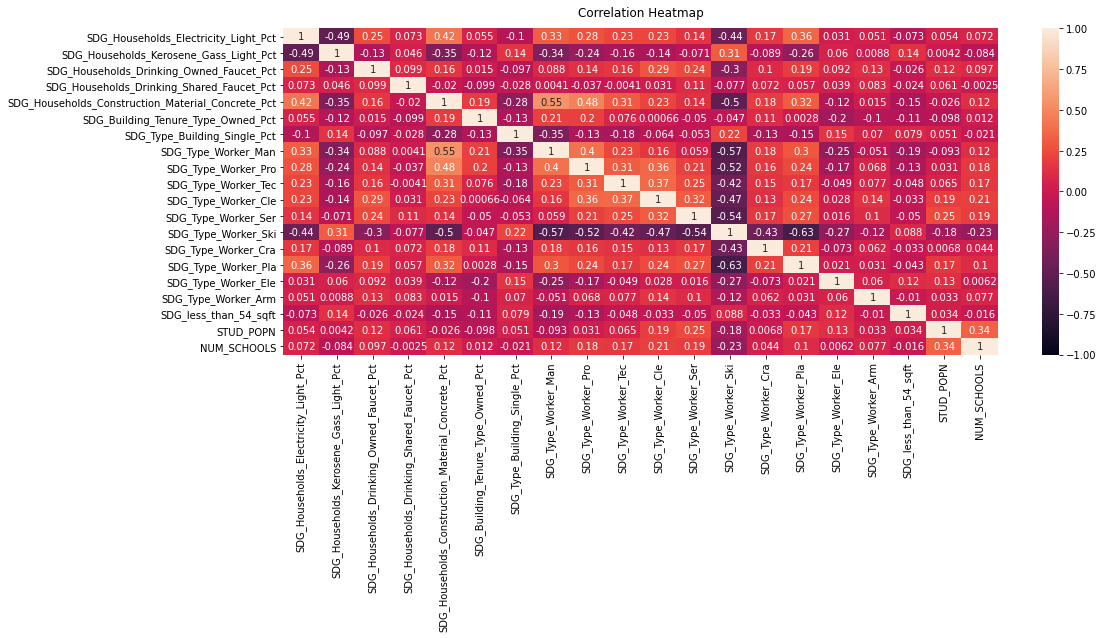

In [8]:
heatmap_df = raw_sdg_df.drop(['PSGC_BRGY'], axis=1)
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(cluster_df.corr(), vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [9]:
kmeans_data = cluster_df.copy()
# kmeans_data = kmeans_data.drop(['ratio_elem'], axis=1)
# kmeans_data.loc[kmeans_data['SCH_ELEM'].idxmax(), 'PSGC_BRGY']

### 3. SCALE DATA

In [10]:
from sklearn.preprocessing import normalize

In [11]:
# scaler = StandardScaler()
X_scaled = normalize(kmeans_data)

### 4. PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=len(kmeans_data.columns))
X_principal = pca.fit_transform(X_scaled)

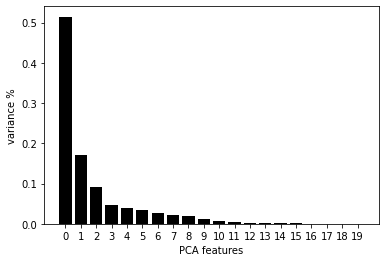

In [14]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [15]:
pca.explained_variance_ratio_

array([5.14377038e-01, 1.71462096e-01, 9.24333768e-02, 4.67913905e-02,
       3.88153100e-02, 3.39468465e-02, 2.65768325e-02, 2.29128110e-02,
       2.00925954e-02, 1.24238106e-02, 6.39382475e-03, 4.54388356e-03,
       2.39003885e-03, 2.30446311e-03, 2.11657774e-03, 1.58527553e-03,
       4.76723496e-04, 1.87612705e-04, 1.01205185e-04, 6.82878975e-05])

In [16]:
PCA_THRESHOLD = 0.45

In [17]:
explained_ratio = list(pca.explained_variance_ratio_)
feature_list = []
for i in range(pca.n_components_):
    if explained_ratio[i] > PCA_THRESHOLD:
        feature_list.append(i)

In [18]:
feature_list

[0]

In [19]:
PCA_components = pd.DataFrame(X_principal)
PCA_components = PCA_components[feature_list]
PCA_components.head()

,0
0,0.413594
1,0.082524
2,-0.117038
3,-0.214981
4,-0.100719


## CLUSTERING

In [20]:
from sklearn.cluster import KMeans

In [21]:
sse = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(PCA_components)
    sse.append(kmeans.inertia_)

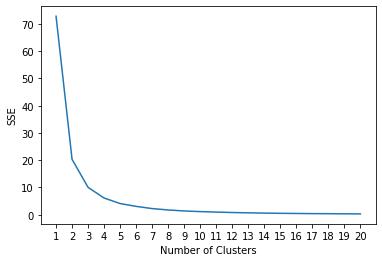

In [22]:
plt.plot(range(1,21), sse)
plt.xticks(range(1,21))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [23]:
N_CLUSTERS = 3

In [24]:
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
predicted = kmeans.fit_predict(PCA_components)

In [26]:
kmeans_data['PSGC_BRGY'] = raw_sdg_df['PSGC_BRGY']
# kmeans_data['SCH_ELEM'] = dataset['SCH_ELEM']
# kmeans_data['ratio'] = dataset['ratio_elem']
kmeans_data['cluster'] = predicted

In [27]:
X_array = pd.DataFrame(X_scaled, columns=cluster_df.columns)
X_array['cluster'] = predicted

In [28]:
eval_df = X_array.copy()
# eval_df = eval_df.drop(['PSGC_BRGY'], axis=1)
eval_df = eval_df.groupby('cluster', as_index=False).mean()
# eval_df = eval_df.drop(['cluster'], axis=1)
eval_df

,cluster,SDG_Households_Electricity_Light_Pct,SDG_Households_Kerosene_Gass_Light_Pct,SDG_Households_Drinking_Owned_Faucet_Pct,SDG_Households_Drinking_Shared_Faucet_Pct,SDG_Households_Construction_Material_Concrete_Pct,SDG_Building_Tenure_Type_Owned_Pct,SDG_Type_Building_Single_Pct,SDG_Type_Worker_Man,SDG_Type_Worker_Pro,...,SDG_Type_Worker_Cle,SDG_Type_Worker_Ser,SDG_Type_Worker_Ski,SDG_Type_Worker_Cra,SDG_Type_Worker_Pla,SDG_Type_Worker_Ele,SDG_Type_Worker_Arm,SDG_less_than_54_sqft,STUD_POPN,NUM_SCHOOLS
0,0,0.048015,0.037189,0.011047,0.016915,0.011527,0.074815,0.138111,0.009015,0.003448,...,0.001875,0.011385,0.091341,0.003450,0.008835,0.016492,0.000330,0.013368,0.969876,0.002524
1,1,0.118845,0.058200,0.016754,0.033198,0.035346,0.204488,0.268406,0.026162,0.009225,...,0.002776,0.018320,0.184148,0.009349,0.015592,0.025677,0.000748,0.025786,0.875060,0.004173
2,2,0.306141,0.027758,0.032238,0.040800,0.097935,0.346422,0.355655,0.062513,0.021283,...,0.004800,0.020481,0.219947,0.014226,0.028905,0.024024,0.000970,0.018783,0.697725,0.005959


In [29]:
df_pivot = pd.pivot_table(
    eval_df,
    columns='cluster'
)

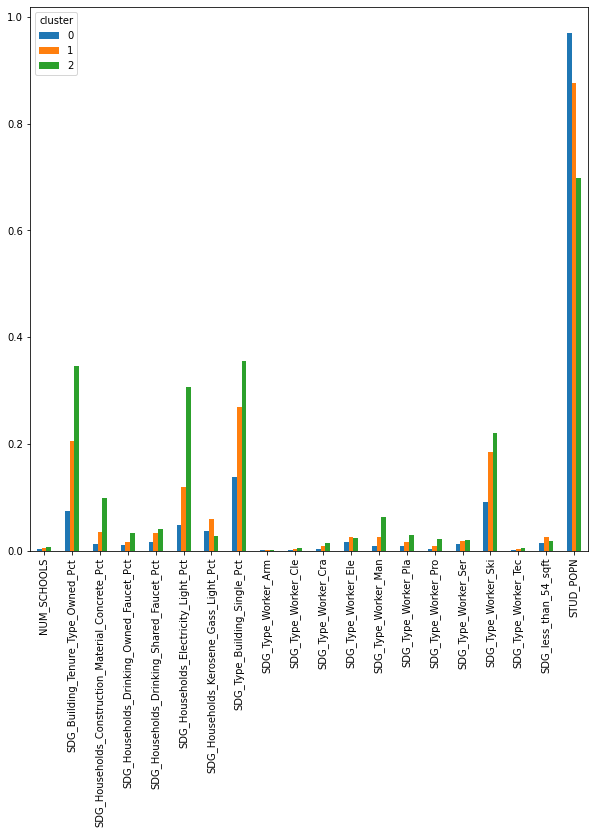

In [30]:

df_pivot.plot(kind="bar", figsize=(10,10))

plt.show()

In [31]:
kmeans_data.to_csv(OUTPUT_PATH + 'cluster_sgd_only.csv', index=False)